**Engy-5310** Computational Continuum Transport Phenomena, UMass Lowell, Chem. Eng. Nuclear Program Fall 2021; Prof. V. F. de Almeida

# Title
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\flux}{\boldsymbol{q}}
  \newcommand{\fluxc}{\boldsymbol{q}_\text{c}}
  \newcommand{\fluxf}{\boldsymbol{q}_\text{f}}
  \newcommand{\velocity}{\boldsymbol{v}}
  \newcommand{\normal}{\boldsymbol{n}}
  \newcommand{\xpoint}{\boldsymbol{x}}
  \newcommand{\Tc}{T_\text{c}}
  \newcommand{\wc}{w_\text{c}}
  \newcommand{\Tf}{T_\text{f}}
  \newcommand{\wf}{w_\text{f}}
  \newcommand{\wI}{w_\text{I}}
  \newcommand{\Ri}{R_\text{i}}
  \newcommand{\Ro}{R_\text{o}}
  \newcommand{\Omegac}{\Omega_\text{c}}
  \newcommand{\Omegaf}{\Omega_\text{f}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \DeclareMathOperator{\div}{div}
  \DeclareMathOperator{\gradx}{grad_\xpoint}
  \DeclareMathOperator{\divx}{div_\xpoint}
  \DeclareMathOperator{\grad}{grad}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
$

**Student(s):**  `your name(s)` <br>
**Course:** Engy-5310 Computational Continuum Transport Phenomena  <br>
**Mentor and Collaborator:** `Prof. name`

UMass Lowell, Dept. of Chemical Engineering, Nuclear Energy Program 
<br>
**22Nov2021**

---
## Table of Contents<a id="toc"></a>
* [Introduction](#intro)
* [Problem Statement](#problem)
* [Objectives](#obj)
* [Approach](#app)
 + [Weak Form of Problem Statement](#weakform)
 + [MOOSE Kernels](#kernels)
 + [Tests](#tests)
 + [Setup](#setup)
   - [Test 1](#1dsolofueldirichlet)
   - [Test 2](#1dsolofueldirichletrobin)
* [2-D Results and Analysis](#ranalysis)
* [Conclusions](#conclusions)
* [References](#refs)
---

## [Introduction](#toc)<a id="intro"></a>

`text goes here`

## [Problem Statement](#toc)<a id="problem"></a>

`mathematical statement of problem`


### Domain
`describe domain`

## [Objectives](#toc)<a id="obj"></a>

`state objectives`

## [Approach](#toc)<a id="app"></a>

A Galerkin weak formulation follows below and the implementation of the integrands as MOOSE kernels are described next.

### [Weak Form of Problem Statement](#toc)<a id="weakform"></a> 


### [MOOSE Kernels](#toc)<a id="kernels"></a>


### [Tests](#toc)<a id="tests"></a>


### [Setup](#toc)<a id="setup"></a>

In [1]:
'''SI units'''
from scipy import constants as unit
unit.kelvin = 1.0
unit.second = 1.0
unit.joule = 1.0
unit.meter = 1.0
unit.watt = unit.joule/unit.second
unit.kg = unit.kilo*unit.gram
import numpy as np

In [23]:
'''Plot function for FEM Solution'''
def plot_solution(df1=None, df2=None, 
                  x_scale=1,
                  y1_scale=1,
                  y2_scale=1,
                  xlabel=r'$x$ []',
                  y1label=r'$u_h(x)$ []',
                  y2label=r'$q_h(x)$ []',
                  df3=None,
                  title='No Title', 
                  u1_legend='no u1 legend',
                  u2_legend='no u2 legend',
                  u1_flux_legend='no u1 flux legend',
                  u2_flux_legend='no u2 flux legend',
                  flux_decimal_digits=5):
    '''Plot solution for fuel and coolant
    '''
    import matplotlib.pyplot as plt
    #%matplotlib inline
    plt.style.use('dark_background')
    import numpy as np

    (fig, ax1) = plt.subplots(1, figsize=(15, 6))

    if df1 is not None:
        ax1.plot(df1['x']*x_scale, df1['uFuel'], 'r*-', label=u1_legend)
    if df2 is not None:
        ax1.plot(df2['x']*x_scale, df2['uCoolant'], '*--', color='magenta', label=u2_legend)

    ax1.set_xlabel(xlabel, fontsize=18)
    ax1.set_ylabel(y1label, fontsize=18, color='white')
    ax1.tick_params(axis='y', labelcolor='white', labelsize=14)
    ax1.tick_params(axis='x', labelsize=14)
    ax1.legend(loc='center left', fontsize=12)
    #ax1.set_ylim(0,1)
    ax1.grid(True)
    
    ax2 = None

    if df1 is not None and 'diffFluxFuel_x' in df1.columns:
        ax2 = ax1.twinx()
        ax2.plot(df1['x']*x_scale, np.round(df1['diffFluxFuel_x'].round(2)*y2_scale, flux_decimal_digits),'*-', 
                 color='yellow', label=u1_flux_legend)
        
    if df2 is not None and 'diffFluxCoolant_x' in df2.columns:
        if ax2 is None:
            ax2 = ax1.twinx()
            
        ax2.plot(df2['x']*x_scale, np.round(df2['diffFluxCoolant_x'].round(2)*y2_scale, flux_decimal_digits),'*--', 
                 color='orange', label=u2_flux_legend)

    if ax2 is not None:
        ax2.set_ylabel(y2label, fontsize=16, color='white')
        ax2.tick_params(axis='y', labelcolor='white', labelsize=14)
        ax2.legend(loc='upper right', fontsize=12)
        #ax2.set_ylim(0,2)
        #ax2.grid(True)

    plt.title(title, fontsize=20)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    print('')

In [3]:
'''Domain'''
x_a = 0
x_b = 100
plate_thickness = 20

In [4]:
'''Parameters'''
diff_coeff_fuel = 1.0
diff_coeff_coolant = 1.0
buckling = 2.0322e-2
diff_length = 94.7

In [5]:
'''Data (boundary conditions for testing purposes)'''
u_b = 0.0

In [6]:
'''FEM Solution'''
n_felem_fuel = 3
n_felem_coolant = 10

order = 'second'
flux_order = 'first'

fdp_full = True
n_plot_pts_fuel = 2*n_felem_fuel + 1
n_plot_pts_coolant = 2*n_felem_coolant + 1

In [7]:
def write_input_file(pjfnk=False):
    import pyhit
    import moosetree
    root = pyhit.load('')
    
    prblm = root.insert(-1,'Problem')
    prblm['type'] = 'FEProblem'
    prblm['coord_type'] = 'XYZ'

    mesh = root.insert(-1,'Mesh')
    
    omega1 = mesh.insert(-1,'omega1')
    omega1['type'] = 'GeneratedMeshGenerator'
    omega1['dim'] = 1
    omega1['xmin'] = x_a
    omega1['xmax'] = plate_thickness/2.0
    omega1['nx'] = n_felem_fuel
    if order == 'second':
        omega1['elem_type'] = 'edge3'
    
    omega2 = mesh.insert(-1,'omega2')
    omega2['type'] = 'GeneratedMeshGenerator'
    omega2['dim'] = 1
    omega2['xmin'] = plate_thickness/2.0
    omega2['xmax'] = x_b
    omega2['nx'] = n_felem_coolant
    if order == 'second':
        omega2['elem_type'] = 'edge3'

    omega = mesh.insert(-1,'omega')
    omega['type'] = 'StitchedMeshGenerator'
    omega['inputs'] = "'omega1 omega2'"
    omega['stitch_boundaries_pairs'] = "'right left'"
    omega['clear_stitched_boundary_ids'] = 'true'
    
    mod1 = mesh.insert(-1,'mod1')
    mod1['type'] = 'SubdomainBoundingBoxGenerator'
    mod1['input'] = 'omega'
    mod1['block_id'] = 1
    mod1['block_name'] = 'omega_1'
    mod1['bottom_left'] = str(x_a)+' 0 0'
    mod1['top_right'] = str(plate_thickness/2.0)+' 1 0'
    
    mod2 = mesh.insert(-1,'mod2')
    mod2['type'] = 'SubdomainBoundingBoxGenerator'
    mod2['input'] = 'mod1'
    mod2['block_id'] = 2
    mod2['block_name'] = 'omega_2'
    mod2['bottom_left'] = str(plate_thickness/2.0)+' 0 0'
    mod2['top_right'] = str(x_b)+' 1 0'
    
    mod3 = mesh.insert(-1,'mod3')
    mod3['type'] = 'SideSetsBetweenSubdomainsGenerator'
    mod3['input'] = 'mod2'
    mod3['primary_block'] = 'omega_1'
    mod3['paired_block'] = 'omega_2' 
    mod3['new_boundary'] = 'interface_12'
    
    mod4 = mesh.insert(-1,'mod4')
    mod4['type'] = 'SideSetsAroundSubdomainGenerator'
    mod4['input'] = 'mod3'
    mod4['block'] = 'omega_1'
    mod4['normal'] = '-1 0 0'
    mod4['new_boundary'] = 'left'
    
    mod5 = mesh.insert(-1,'mod5')
    mod5['type'] = 'SideSetsAroundSubdomainGenerator'
    mod5['input'] = 'mod4'
    mod5['block'] = 'omega_2'
    mod5['normal'] = '1 0 0'
    mod5['new_boundary'] = 'right'

    vars = root.insert(-1,'Variables')
    
    fuel = vars.insert(-1,'uFuel')
    fuel['block'] = 'omega_1'
    fuel['order'] = order
    fuel['family'] = 'lagrange'
    fuel['initial_condition'] = 1
    
    coolant = vars.insert(-1,'uCoolant')
    coolant['block'] = 'omega_2'
    coolant['order'] = order
    coolant['family'] = 'lagrange'
    coolant['initial_condition'] = 1
    
    aux_vars = root.insert(-1,'AuxVariables')
    
    diff_flux_fuel = aux_vars.insert(-1,'diffFluxFuel')
    diff_flux_fuel['block'] = 'omega_1'
    diff_flux_fuel['order'] = flux_order
    diff_flux_fuel['family'] = 'monomial_vec'
    
    diff_flux_fuel_x = aux_vars.insert(-1,'diffFluxFuel_x')
    diff_flux_fuel_x['block'] = 'omega_1'
    diff_flux_fuel_x['order'] = flux_order
    diff_flux_fuel_x['family'] = 'monomial'
    
    diff_flux_coolant = aux_vars.insert(-1,'diffFluxCoolant')
    diff_flux_coolant['block'] = 'omega_2'
    diff_flux_coolant['order'] = flux_order
    diff_flux_coolant['family'] = 'monomial_vec'
    
    diff_flux_coolant_x = aux_vars.insert(-1,'diffFluxCoolant_x')
    diff_flux_coolant_x['block'] = 'omega_2'
    diff_flux_coolant_x['order'] = flux_order
    diff_flux_coolant_x['family'] = 'monomial'

    kernels = root.insert(-1,'Kernels')
    
    diff_fuel = kernels.insert(-1,'diffusion-fuel')
    diff_fuel['type'] = 'DiffusionTerm'
    diff_fuel['block'] = 'omega_1'
    diff_fuel['variable'] = 'uFuel'
    diff_fuel['diffCoeff'] = diff_coeff_fuel
    
    source_fuel = kernels.insert(-1,'source-fuel')
    source_fuel['type'] = 'SourceTerm'
    source_fuel['block'] = 'omega_1'
    source_fuel['variable'] = 'uFuel'
    source_fuel['sourceSlope'] = buckling**2
    
    diff_coolant = kernels.insert(-1,'diffusion-coolant')
    diff_coolant['type'] = 'DiffusionTerm'
    diff_coolant['block'] = 'omega_2'
    diff_coolant['variable'] = 'uCoolant'
    diff_coolant['diffCoeff'] = diff_coeff_coolant
    
    source_coolant = kernels.insert(-1,'source-coolant')
    source_coolant['type'] = 'SourceTerm'
    source_coolant['block'] = 'omega_2'
    source_coolant['variable'] = 'uCoolant'
    source_coolant['sourceSlope'] = - 1/diff_length**2    
    
    interf_kernels = root.insert(-1,'InterfaceKernels')
    
    n_flux = interf_kernels.insert(-1,'normal-flux-continuity')
    n_flux['type'] = 'InterfaceNormalFluxContinuity'
    n_flux['variable'] = 'uFuel'
    n_flux['neighbor_var'] = 'uCoolant'
    n_flux['boundary'] = 'interface_12'
    n_flux['diffCoeff'] = diff_coeff_fuel
    n_flux['diffCoeffNeighbor'] = diff_coeff_coolant
    
    t_jump = interf_kernels.insert(-1,'u-jump')
    t_jump['type'] = 'InterfaceJump'
    t_jump['variable'] = 'uFuel'
    t_jump['neighbor_var'] = 'uCoolant'
    t_jump['boundary'] = 'interface_12'
    t_jump['transferCoeff'] = 1e+10
    t_jump['adsorptionCoeff'] = 0.0
    t_jump['diffCoeff'] = diff_coeff_fuel

    aux_kernels = root.insert(-1,'AuxKernels')
    
    diff_flux_fuel = aux_kernels.insert(-1,'diffusion-flux-fuel')
    diff_flux_fuel['type'] = 'DiffusionFlux'
    diff_flux_fuel['block'] = 'omega_1'
    diff_flux_fuel['field'] = 'uFuel'
    diff_flux_fuel['diffCoeff'] = diff_coeff_fuel
    diff_flux_fuel['variable'] = 'diffFluxFuel'
    diff_flux_fuel['execute_on'] = 'timestep_end'
    
    diff_flux_fuel_x = aux_kernels.insert(-1,'diffusion-flux-fuel-x')
    diff_flux_fuel_x['type'] = 'VectorVariableComponentAux'
    diff_flux_fuel_x['block'] = 'omega_1'
    diff_flux_fuel_x['vector_variable'] = 'diffFluxFuel'
    diff_flux_fuel_x['component'] = 'x'
    diff_flux_fuel_x['variable'] = 'diffFluxFuel_x'
    diff_flux_fuel_x['execute_on'] = 'timestep_end'
    
    diff_flux_coolant = aux_kernels.insert(-1,'diffusion-flux-coolant')
    diff_flux_coolant['type'] = 'DiffusionFlux'
    diff_flux_coolant['block'] = 'omega_2'
    diff_flux_coolant['field'] = 'uCoolant'
    diff_flux_coolant['diffCoeff'] = diff_coeff_coolant
    diff_flux_coolant['variable'] = 'diffFluxCoolant'
    diff_flux_coolant['execute_on'] = 'timestep_end'
    
    diff_flux_coolant_x = aux_kernels.insert(-1,'diffusion-flux-coolant-x')
    diff_flux_coolant_x['type'] = 'VectorVariableComponentAux'
    diff_flux_coolant_x['block'] = 'omega_2'
    diff_flux_coolant_x['vector_variable'] = 'diffFluxCoolant'
    diff_flux_coolant_x['component'] = 'x'
    diff_flux_coolant_x['variable'] = 'diffFluxCoolant_x'
    diff_flux_coolant_x['execute_on'] = 'timestep_end'
    
    bcs = root.insert(-1,'BCs')
    
    cl = bcs.insert(-1,'center-line')
    cl['type'] = 'NeumannBC'
    cl['variable'] = 'uFuel'
    cl['boundary'] = 'left'
    cl['value'] = 0 
    
    xb = bcs.insert(-1,'x-b')
    xb['type'] = 'DirichletBC'
    xb['variable'] = 'uCoolant'
    xb['boundary'] = 'right'
    xb['value'] = 0
    
    if pjfnk:
        exe = root.insert(-1,'Executioner')
        exe['type'] = 'Steady'
        exe['solve_type']  = 'PJFNK'
        exe['petsc_options_iname']  = '-pc_type -pc_hypre_type'
        exe['petsc_options_value']  = 'hypre boomeramg'
        exe['l_max_its']  = 20
        exe['l_tol']  = 1e-5
        exe['nl_max_its']  = 15
        exe['nl_rel_tol']  = 1e-8
        exe['nl_abs_tol']  = 1e-8
    elif fdp_full:
        pre = root.insert(-1, 'Preconditioning')
        pre['active'] = 'fdp-newt-full'
        
        fdp = pre.insert(-1, 'fdp-newt-full')
        fdp['type'] = 'FDP'
        fdp['full'] = 'true'
        fdp['solve_type'] = 'NEWTON'
        fdp['petsc_options_iname'] = ""'-pc_type -mat_fd_coloring_err -mat_fd_type'""
        fdp['petsc_options_value'] = ""'lu  1e-8          ds'""
        
        exe = root.insert(-1,'Executioner')
        exe['type'] = 'Steady'

    vp = root.insert(-1,'VectorPostprocessors')
    
    omega_1 = vp.insert(-1,'omega_1')
    omega_1['type'] = 'LineValueSampler'
    omega_1['execute_on'] = 'timestep_end final'
    omega_1['variable'] = 'uFuel diffFluxFuel_x'  
    omega_1['start_point'] = str(x_a)+' 0 0'
    omega_1['end_point'] = str(plate_thickness/2.0*0.995)+' 0 0'
    omega_1['num_points'] = n_plot_pts_fuel
    omega_1['sort_by'] = 'id'
    
    omega_2 = vp.insert(-1,'omega_2')
    omega_2['type'] = 'LineValueSampler'
    omega_2['execute_on'] = 'timestep_end final'
    omega_2['variable'] = 'uCoolant diffFluxCoolant_x'  
    omega_2['start_point'] = str(plate_thickness/2.0*1.005)+' 0 0'
    omega_2['end_point'] = str(x_b)+' 0 0'
    omega_2['num_points'] = n_plot_pts_coolant
    omega_2['sort_by'] = 'id'  

    out = root.insert(-1,'Outputs')
    out['console'] = 'true'
    csv = out.insert(-1,'csv')
    csv['type'] = 'CSV'
    csv['file_base'] = 'output'
    csv['execute_on'] = 'final'
    
    debug = root.insert(-1,'Debug')
    debug['show_var_residual_norms'] = 'true'

    pyhit.write('input.hit', root)

#### [Test 1](#toc)<a id="1dsolofueldirichlet"></a>


In [8]:
'''Input file'''
write_input_file()
!cat input.hit

[Problem]
  type = FEProblem
  coord_type = XYZ
[]
[Mesh]
  [omega1]
    type = GeneratedMeshGenerator
    dim = 1
    xmin = 0
    xmax = 10.0
    nx = 3
    elem_type = edge3
  []
  [omega2]
    type = GeneratedMeshGenerator
    dim = 1
    xmin = 10.0
    xmax = 100
    nx = 10
    elem_type = edge3
  []
  [omega]
    type = StitchedMeshGenerator
    inputs = 'omega1 omega2'
    stitch_boundaries_pairs = 'right left'
    clear_stitched_boundary_ids = true
  []
  [mod1]
    type = SubdomainBoundingBoxGenerator
    input = omega
    block_id = 1
    block_name = omega_1
    bottom_left = '0 0 0'
    top_right = '10.0 1 0'
  []
  [mod2]
    type = SubdomainBoundingBoxGenerator
    input = mod1
    block_id = 2
    block_name = omega_2
    bottom_left = '10.0 0 0'
    top_right = '100 1 0'
  []
  [mod3]
    type = SideSetsBetweenSubdomainsGenerator
    input = mod2
    primary_block = omega_1
    paired_block = omega_2
    new_boundary = interface_12
  []
  [mod4]
    type = SideSetsAro

In [9]:
'''Delete any previous *.csv files'''
!rm output_omega_*.csv

In [10]:
'''Run MOOSE App'''
!./fuel_plate-opt -i input.hit


In ReplicatedMesh::stitch_meshes:
This mesh has 1 nodes on boundary 1.
Other mesh has 1 nodes on boundary 0.
Minimum edge length on both surfaces is 3.33333.
In ReplicatedMesh::stitch_meshes:
Found 1 matching nodes.

Framework Information:
MOOSE Version:           git commit 38d37b938c on 2021-10-22
LibMesh Version:         aebb5a5c0e1f6d8cf523a720e19f70a6d17c0236
PETSc Version:           3.16.0
SLEPc Version:           3.16.0
Current Time:            Sat Dec 18 07:36:06 2021
Executable Timestamp:    Sat Dec 18 07:20:30 2021

Parallelism:
  Num Processors:          1
  Num Threads:             1

Mesh: 
  Parallel Type:           replicated
  Mesh Dimension:          1
  Spatial Dimension:       1
  Nodes:                   27
  Elems:                   13
  Num Subdomains:          2

Nonlinear System:
  Num DOFs:                28
  Num Local DOFs:          28
  Variables:               "uFuel" "uCoolant" 
  Finite Element Types:    "LAGRANGE" "LAGRANGE" 
  Approximation Orders:    

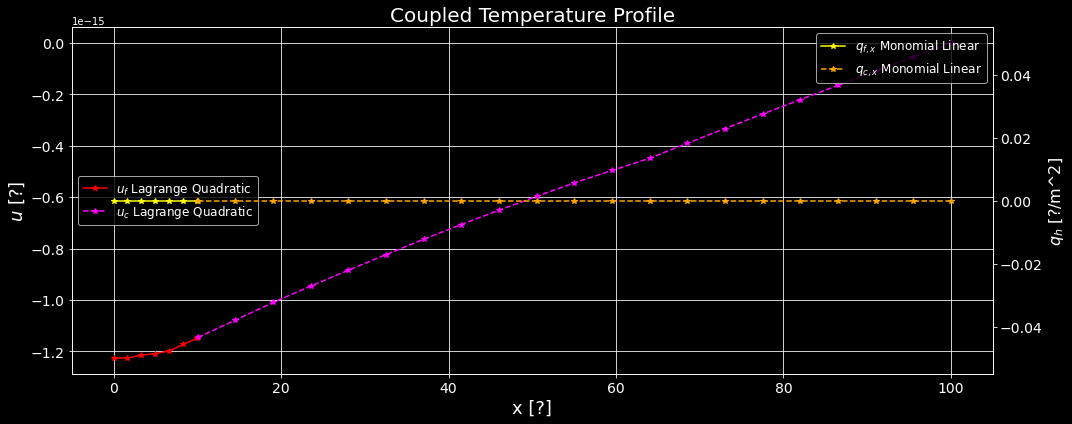

In [24]:
'''Show FEM Solution'''

import pandas as pd
df1 = pd.read_csv('output_omega_1_0002.csv')
df2 = pd.read_csv('output_omega_2_0002.csv')
    
plot_solution(df1=df1, df2=df2, title='Coupled Temperature Profile',
              u1_legend=r'$u_f$ Lagrange Quadratic',
              u1_flux_legend=r'$q_{f,x}$ Monomial Linear',
              u2_legend=r'$u_c$ Lagrange Quadratic',
              u2_flux_legend=r'$q_{c,x}$ Monomial Linear',
              x_scale=1,
              xlabel='x [?]', y1label=r'$u$ [?]', 
              y2_scale=1, y2label=r'$q_h$ [?/m^2]')

In [12]:
df1

,diffFluxFuel_x,id,uFuel,x,y,z
0,3.446699e-18,0.000000,-1.226482e-15,0.000000,0,0
1,-3.400384e-18,1.658333,-1.226521e-15,1.658333,0,0
2,-1.024747e-17,3.316667,-1.215204e-15,3.316667,0,0
3,-4.814464e-18,4.975000,-1.209235e-15,4.975000,0,0
4,-7.405709e-18,6.633333,-1.199102e-15,6.633333,0,0
5,-1.511092e-17,8.291667,-1.173512e-15,8.291667,0,0
6,-1.412275e-17,9.950000,-1.149273e-15,9.950000,0,0


In [13]:
df2

,diffFluxCoolant_x,id,uCoolant,x,y,z
0,-1.486109e-17,0.0000,-1.146170e-15,10.0500,0,0
1,-1.514815e-17,4.4975,-1.078687e-15,14.5475,0,0
2,-1.431235e-17,8.9950,-1.009963e-15,19.0450,0,0
3,-1.396459e-17,13.4925,-9.463751e-16,23.5425,0,0
4,-1.361481e-17,17.9900,-8.843515e-16,28.0400,0,0
5,-1.339514e-17,22.4875,-8.236129e-16,32.5375,0,0
6,-1.293519e-17,26.9850,-7.638706e-16,37.0350,0,0
7,-1.259388e-17,31.4825,-7.064621e-16,41.5325,0,0
8,-1.212830e-17,35.9800,-6.505924e-16,46.0300,0,0
9,-1.183327e-17,40.4775,-5.967088e-16,50.5275,0,0


#### [Test 2](#toc)<a id="1dsolofueldirichletrobin"></a>

In [14]:
'''Parameters'''

'Parameters'

In [15]:
'''Input file mod'''

'Input file mod'

In [16]:
'''Run MOOSE App'''

'Run MOOSE App'

In [17]:
'''Solution'''

'Solution'

## [2-D Results and Analysis](#toc)<a id="ranalysis"></a>

In [18]:
'''Parameters'''

'Parameters'

In [19]:
'''FEM Parameters'''

'FEM Parameters'

In [20]:
'''Input file mod'''

'Input file mod'

In [21]:
'''Run MOOSE App'''

'Run MOOSE App'

In [22]:
'''Show 2D solution'''

'Show 2D solution'

## [Conclusions](#toc)<a id="conclusions"></a>

## [References](#toc)<a id="refs"></a>

- [1] V. F. de Almeida, [*Engy-5310: Computational Continuum Transport Phenomena*](https://github.com/dpploy/engy-5310), University of Massachusetts Lowell, Dept. of Chemical Engineering (Nuclear Energy Program).
- [2] Multiphysics Object-Oriented Simulation Environment [(MOOSE)](https://mooseframework.org)
- [4] author, [reference]()